<a href="https://colab.research.google.com/github/NguyenThiPhuongNhi/MayHoc_2022_2023/blob/main/Lab_7_20130353_NguyenThiPhuongNhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
# code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
# tol =n: số dừng khi trọng tâm thay đổi n giá trị
# cross-validate: lấy giá trị tuần tự 1,2,...k: 1=test, còn lại là train, tiếp tục 2 là test còn lại là train đến khi hết k
# completeness_score: các mẫu data giống nhau gộp một cụm => ~~1
# SSE: Khoảng cách từ tâm đến các phần tử trong cụm

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
#code
data = datasets.load_iris()
X= data['data']
y= data['target']

In [4]:
# cross_validate
clf = svm.SVC(kernel='sigmoid', random_state=0, max_iter=10000) 
scores_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10)
# scores_p = cross_validate(clf, X, y, scoring ="precision_score", cv = 10 )
scores_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

# print("fit_time", np.mean(scores['fit_time']))
# print("score_time", np.mean(scores['score_time']))
print("accuracy", np.mean(scores_a['test_score']))
# print("precision", np.mean(scores_p['test_score']))
print("recall", np.mean(scores_r['test_score']))
print("f1", np.mean(scores_f['test_score']))


# data={'accuracy':[np.mean(scores_a['score_time'])],
#       'precision':[np.mean(scores_p['score_time'])],
#       'recall':[np.mean(scores_r['score_time'])],
#       'f1':[np.mean(scores_f['score_time'])]}

# row_labels = ['cross_validate']

# dframe = pd.DataFrame(data=data,index = row_labels)
# dframe

accuracy 0.06666666666666668
recall 0.06666666666666667
f1 0.041984126984126985


In [5]:
# cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel="rbf", random_state=0)
scores =cross_val_score(model, X, y, scoring ="accuracy", cv = 10 )

print("scores.mean(): ", scores.mean())

scores.mean():  0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [6]:
#code
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [7]:
X_new = SelectKBest(chi2, k=2).fit_transform(X,y)

In [8]:
#Random forest
clf=RandomForestClassifier(n_estimators=100)
scores = cross_validate(clf, X_new, y, scoring ="accuracy", cv = 10)
print("fit_time", np.mean(scores['fit_time']))
print("score_time", np.mean(scores['score_time']))
print("test_score", np.mean(scores['test_score']))


fit_time 0.16480460166931152
score_time 0.009856057167053223
test_score 0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [9]:
# code
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.stats import mode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [10]:
mnist = datasets.load_digits()
kmeans = KMeans(n_clusters = 10, n_init=10, random_state = 0) #n_init = 10 (mac dinh)
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape
# sse = []
# for k in range(1, 11):
#   kmeans = KMeans(n_clusters=k, random_state = 0)
#   kmeans.fit(mnist.data)
#   sse.append(kmeans.inertia_)

# plt.plot(sse, label="sse")
# plt.xlabel("k")
# plt.legend()

In [11]:
labels = np.zeros_like(clusters)
for i in range(3): #3: số lớp trong tập dữ liệu
  mask = (clusters == i)
  # print(mask)
  labels[mask] = mode(mnist.target[mask])[0]
  # print(labels[mask])
print("accuracy: ",accuracy_score(mnist.target, labels))
print("precision: ",precision_score(mnist.target, labels,average="macro"))
print("recall: ",recall_score(mnist.target, labels,average="macro"))
print("f1: ",f1_score(mnist.target, labels,average="macro"))

accuracy:  0.35058430717863104
precision:  0.29052077194767334
recall:  0.34837173105573116
f1:  0.2857716726929039


<ipython-input-11-e40e5593f344>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [12]:
# code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
#Random forest
clf=RandomForestClassifier(n_estimators=100)
scores_Random_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10 )
scores_Random_p = cross_validate(clf, X, y, scoring ="precision_macro", cv = 10 )
scores_Random_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_Random_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

# kNN
knn = KNeighborsClassifier(n_neighbors=5)
scores_kNN_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10 )
scores_kNN_p = cross_validate(clf, X, y, scoring ="precision_macro", cv = 10 )
scores_kNN_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_kNN_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

#NaiveBayes 
clf = GaussianNB()
scores_Gauss_a = cross_validate(clf, X, y, scoring ="accuracy", cv = 10 )
scores_Gauss_p = cross_validate(clf, X, y, scoring ="precision_macro", cv = 10 )
scores_Gauss_r = cross_validate(clf, X, y, scoring ="recall_macro", cv = 10 )
scores_Gauss_f = cross_validate(clf, X, y, scoring ="f1_macro", cv = 10 )

In [14]:
data={'accuracy':[np.mean(scores_Random_a['test_score']),np.mean(scores_kNN_a['test_score']),np.mean(scores_Gauss_a['test_score'])],
      'precision':[np.mean(scores_Random_p['test_score']),np.mean(scores_kNN_p['test_score']),np.mean(scores_Gauss_p['test_score'])],
      'recall':[np.mean(scores_Random_r['test_score']),np.mean(scores_kNN_r['test_score']),np.mean(scores_Gauss_r['test_score'])],
      'f1':[np.mean(scores_Random_f['test_score']),np.mean(scores_kNN_f['test_score']),np.mean(scores_Gauss_f['test_score'])]}

row_labels = ['Random forest', 'kNN','NaiveBayes']

dframe = pd.DataFrame(data=data,index = row_labels)
dframe

,accuracy,precision,recall,f1
Random forest,0.960000,0.964444,0.960000,0.959731
kNN,0.960000,0.958889,0.966667,0.966330
NaiveBayes,0.953333,0.962698,0.953333,0.952441


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [15]:
#code
print("Co giam sat > khong giam sat")

Co giam sat > khong giam sat


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [16]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/MayHoc/Lab2'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/MayHoc/Lab2


In [17]:
dataset = pd.read_csv("shopping-data.csv")
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


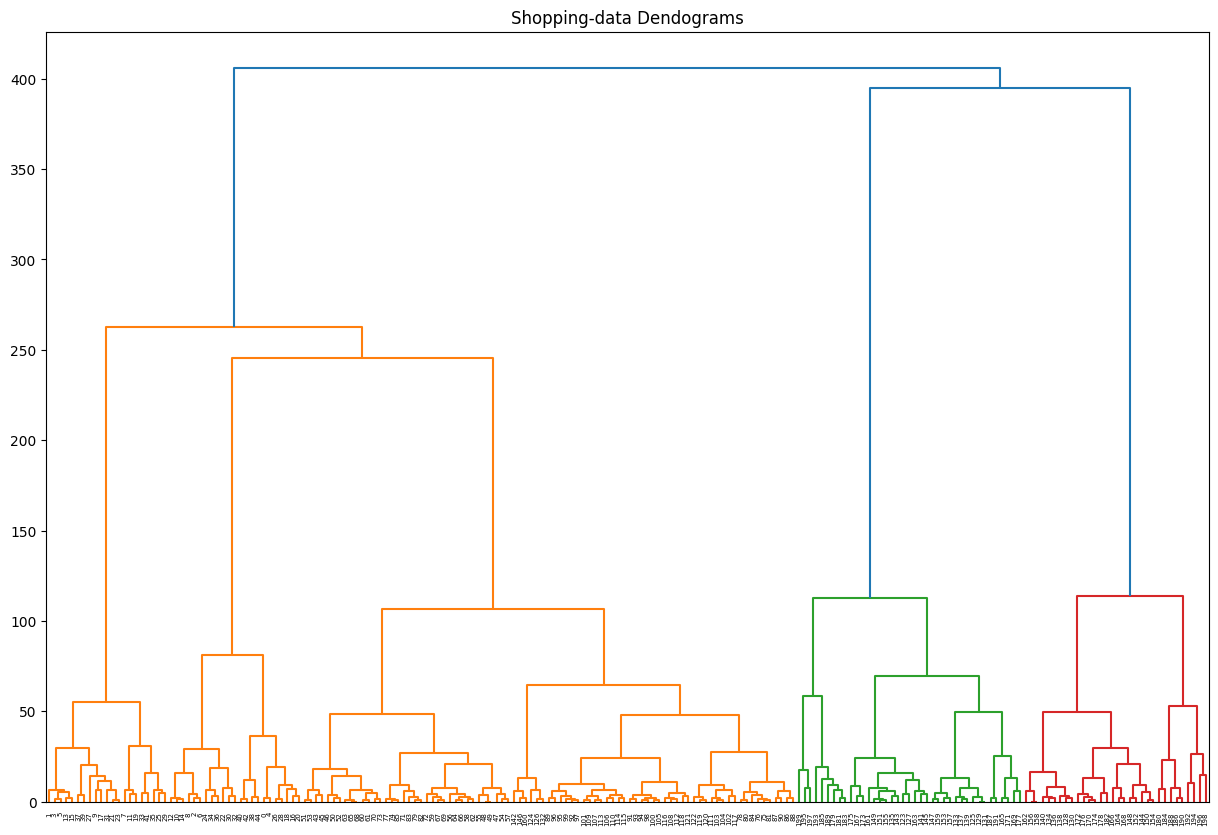

In [18]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc


plt.figure(figsize=(15, 10)) #kich thuoc (chieu dai, chieu rong)
plt.title("Shopping-data Dendograms")
dend = shc.dendrogram(shc.linkage(dataset.iloc[:, 3:5].values, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

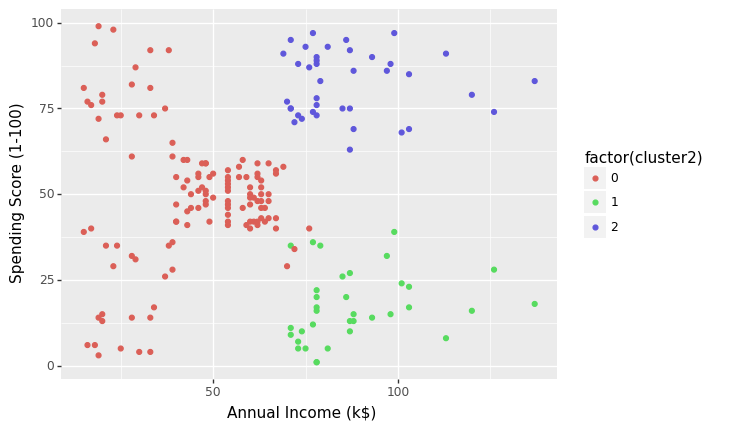

<ggplot: (8752261482780)>

In [77]:
#code
from sklearn.metrics.cluster import silhouette_score
from plotnine import ggplot, aes, geom_line,geom_point


sse = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state = 42)
  kmeans.fit(dataset.iloc[:, 3:5].values)
  sse.append(kmeans.inertia_)

(ggplot(dataset, aes(x="Annual Income (k$)", y="Spending Score (1-100)", color = "factor(cluster2)"))+geom_point())


# kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing")
# kl.elbow
# plt.plot(sse, label="sse")
# plt.xlabel("k")
# plt.legend()

# print("k=3")

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [72]:
#code
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
# X = dataset[features]

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_
# dendro = sch.dendrogram(sch.linkage(X, method = "ward", metric="euclidean"))
# membership = cluster.labels_
# membership

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [68]:
# from sklearn.metrics.cluster import silhouette_score
# from plotnine import ggplot, aes, geom_line,geom_point
# silhouette_score(X,  cluster.labels_)
# dataset["cluster2"] =  cluster.labels_
# (ggplot(dataset, aes(x="Age", y="Spending Score (1-100)", color = "factor(cluster2)"))+geom_point())
# from sklearn.metrics.cluster import completeness_score

# cluster = AgglomerativeClustering(n_clusters=1, affinity='euclidean', linkage='ward')
# a=cluster.fit_predict(X)

# cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# b=cluster.fit_predict(X)

# cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# c=cluster.fit_predict(X)

# completeness_score(a, b)
# completeness_score(b, c)
# completeness_score(c, a)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead


0.7202651285443623

#Finally,
Save a copy in your Github. Remember renaming the notebook.